# Importation des librairies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
from scipy.optimize import curve_fit
import numpy as np

l'ensemble des données ce trouve sur ce sites : https://statso.io/2024/03/18/market-size-of-evs-case-study/

# Importations des données

In [2]:
ev_data = pd.read_csv('Electric_Vehicle_Population_Data.csv')
ev_data

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177861,7SAYGDEE3N,Pierce,Bonney Lake,WA,98391.0,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,31.0,195224452,POINT (-122.183805 47.18062),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.305307e+10
177862,KM8K23AG1P,Mason,Shelton,WA,98584.0,2023,HYUNDAI,KONA ELECTRIC,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,35.0,228454180,POINT (-123.105305 47.211085),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.304596e+10
177863,5YJYGDEE6M,Grant,Quincy,WA,98848.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,13.0,168797219,POINT (-119.8493873 47.2339933),PUD NO 2 OF GRANT COUNTY,5.302501e+10
177864,WVGKMPE27M,King,Black Diamond,WA,98010.0,2021,VOLKSWAGEN,ID.4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,5.0,182448801,POINT (-122.00451 47.312185),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10


L'ensemble de données fourni contient les colonnes suivantes, chacune représentant différents aspects de la population de véhicules électriques (VE) aux États-Unis :

    VIN (1-10) : Numéro d'identification partiel du véhicule.
    County : Le comté dans lequel le véhicule est immatriculé.
    City : : La ville dans laquelle le véhicule est immatriculé.	
    State  : État dans lequel le véhicule est immatriculé. Il semble que cet ensemble de données se concentre sur l'État de Washington (WA).	
    Postal Code : Le code postal où le véhicule est immatriculé.	
    Model Year : l'année du modèle du véhicule.	
    Make : Le fabricant du véhicule.	
    Model : Le modèle du véhicule.	
    Electric Vehicle Type : Le type de véhicule électrique, par exemple, véhicule électrique à batterie (BEV).	
    Clean Alternative Fuel Vehicle (CAFV) Eligibility : Statut d'admissibilité aux programmes de véhicules à carburant alternatif propre.	
    Electric Range : L'autonomie maximale du véhicule sur une seule charge (en miles).
    Base MSRP : le prix de détail suggéré par le fabricant.	
    Legislative District : Le district législatif où le véhicule est immatriculé.
    DOL Vehicle ID	:  Identification du véhicule du Département des licences.
    Vehicle Location : Coordonnées géographiques de l'emplacement du véhicule.
    Electric Utility :  Le fournisseur de services d'électricité pour l'emplacement du véhicule.	
    2020 Census Tract : Secteur de recensement où se trouve le véhicule.

In [3]:
ev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

# Nettoyage de données

In [21]:
ev_data.isnull().sum()

VIN (1-10)                                               0
County                                                   0
City                                                     0
State                                                    0
Postal Code                                              0
Model Year                                               0
Make                                                     0
Model                                                    0
Electric Vehicle Type                                    0
Clean Alternative Fuel Vehicle (CAFV) Eligibility        0
Electric Range                                           0
Base MSRP                                                0
Legislative District                                     0
DOL Vehicle ID                                           0
Vehicle Location                                         0
Electric Utility                                         0
2020 Census Tract                                       

In [5]:
ev_data = ev_data.dropna()

In [6]:
ev_data.isnull().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

Pour la tâche d’analyse de la taille du marché des véhicules électriques, nous pouvons explorer les domaines suivants :

    1) Adoption des véhicules électriques au fil du temps : analyser la croissance de la population de véhicules électriques par année modèle.
    2) Répartition géographique : comprendre où les véhicules électriques sont le plus souvent immatriculés (par exemple, par comté ou par ville).
    3) Types de VE : Répartition de l'ensemble de données par type de véhicule électrique (BEV, etc.).
    4) Popularité des fabricant et des modèles : identifiez les marques et les modèles les plus populaires parmi les véhicules électriques immatriculés.
    5) Analyse de l’autonomie électrique : analysez l’autonomie électrique des véhicules pour voir comment la technologie des véhicules électriques progresse.
    6) Croissance estimée de la taille du marché : Analysez et trouvez la croissance estimée de la taille du marché des véhicules électriques.

# Adoption des véhicules électrique au fils du temps 

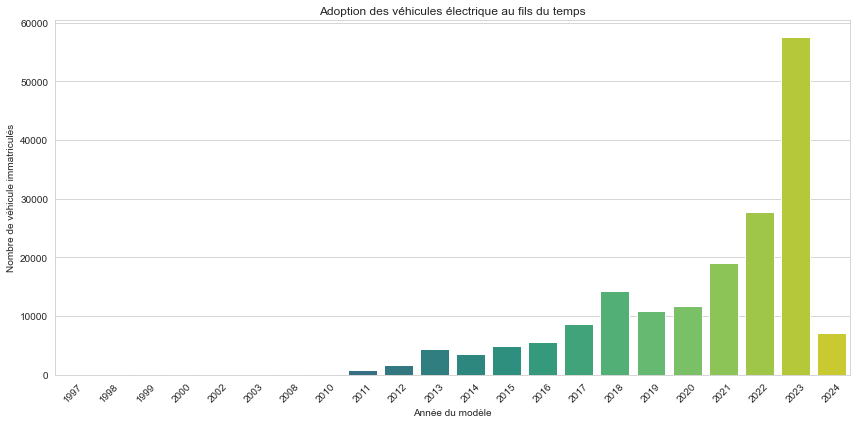

In [7]:
# Adoption des véhicules électrique au fils du temps 
plt.figure(figsize=(12, 6))
ev_adoption_by_year = ev_data['Model Year'].value_counts().sort_index()
sns.barplot(x=ev_adoption_by_year.index, y=ev_adoption_by_year.values, palette="viridis")
plt.title('Adoption des véhicules électrique au fils du temps')
plt.xlabel('Année du modèle')
plt.ylabel('Nombre de véhicule immatriculés')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

D'après le graphique à barres ci-dessus, il est clair que l'adoption des véhicules électriques a augmenté au fil du temps, notant notamment une tendance à la hausse significative à partir de 2016 environ. Le nombre de véhicules immatriculés a augmenté modestement jusqu'à cette date, puis a commencé à augmenter plus rapidement à partir de 2017. L'année 2023 montre une augmentation particulièrement forte du nombre de véhicules électriques immatriculés, la barre pour 2023 étant la plus haute du graphique, indiquant un pic d'adoption des véhicules électriques.

Commençons maintenant par sélectionner les 3 premiers comtés en fonction des immatriculations de véhicules électriques, puis analysons la répartition des véhicules électriques dans les villes de ces comtés :

# Répartition géographique : comprendre où les véhicules électriques sont le plus souvent immatriculés (par exemple, par comté ou par ville)

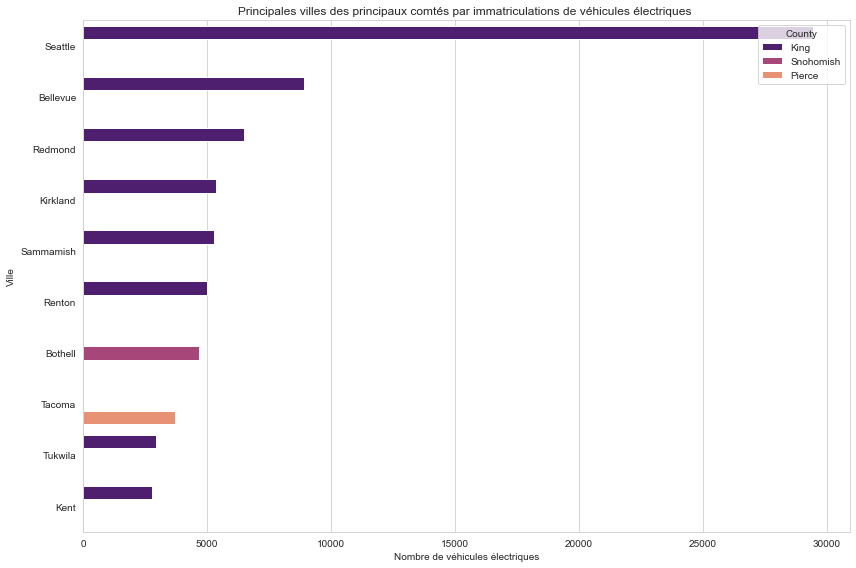

In [8]:
# Répartition géographique au niveau du compté
ev_county_distribution = ev_data['County'].value_counts()
top_counties = ev_county_distribution.head(3).index

# Filtrage de l'ensemble de données pour ces principaux comtés
top_counties_data = ev_data[ev_data['County'].isin(top_counties)]

# Analyser la répartition des véhicules électriques dans les villes de ces principaux comtés
ev_city_distribution_top_counties = top_counties_data.groupby(['County', 'City']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

# Visualisez les 10 premières ville de ces comtés
top_cities = ev_city_distribution_top_counties.head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x='Number of Vehicles', y='City', hue='County', data=top_cities, palette="magma")
plt.title('Principales villes des principaux comtés par immatriculations de véhicules électriques ')
plt.xlabel('Nombre de véhicules électriques')
plt.ylabel('Ville')
plt.legend(title='County')
plt.tight_layout()
plt.show()

Le graphique ci-dessus compare le nombre de véhicules électriques immatriculés dans différentes villes de trois comtés : King, Snohomish et Pierce. Les barres horizontales représentent les villes et leur longueur correspond au nombre de véhicules immatriculés, codé par couleur par comté. Voici les principaux résultats du graphique ci-dessus :

    Seattle, qui se trouve dans le comté de King, compte le plus grand nombre d'immatriculations de véhicules électriques, de loin, surpassant de loin les autres villes répertoriées.
    Bellevue et Redmond, également dans le comté de King, suivent Seattle avec les immatriculations les plus élevées, bien que celles-ci soient considérablement inférieures à celles de Seattle.
    Les villes du comté de Snohomish, telles que Kirkland et Sammamish, affichent des immatriculations de véhicules électriques modérées.
    Tacoma et Tukwila, représentant le comté de Pierce, ont le moins d'immatriculations de véhicules électriques parmi les villes répertoriées, Tacoma étant légèrement devant Tukwila.
    La majorité des villes présentées sont situées dans le comté de King, qui semble dominer les immatriculations de véhicules électriques parmi les trois comtés.

Dans l’ensemble, le graphique indique que l’adoption des véhicules électriques n’est pas uniforme dans les villes et est plus concentrée dans certaines zones, en particulier dans le comté de King.

Explorons ensuite les types de véhicules électriques représentés dans cet ensemble de données. Comprendre la répartition entre les différents types de véhicules électriques, tels que les véhicules électriques à batterie (VEB) et les véhicules hybrides rechargeables (VHR), peut nous éclairer sur les préférences des consommateurs et les schémas d'adoption des solutions purement électriques par rapport aux solutions hybrides. Visualisons donc la répartition des types de véhicules électriques pour identifier les catégories les plus populaires parmi les véhicules immatriculés :

# Types de VE : Répartition de l'ensemble de données par type de véhicule électrique.

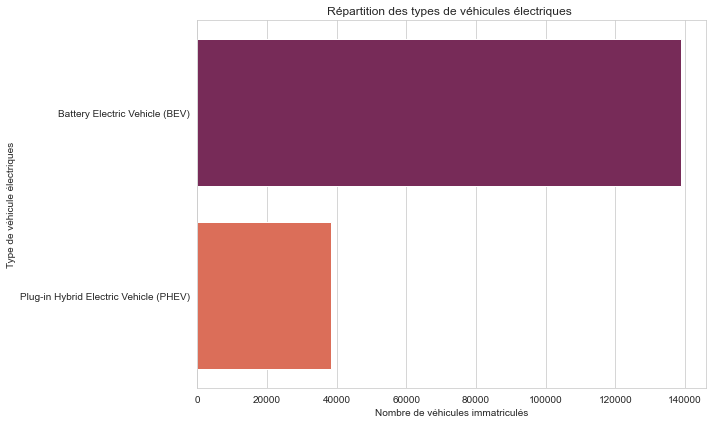

In [9]:
# Analyse de la répartition des types de véhicules électriques 
ev_type_distribution = ev_data['Electric Vehicle Type'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=ev_type_distribution.values, y=ev_type_distribution.index, palette="rocket")
plt.title('Répartition des types de véhicules électriques ')
plt.xlabel('Nombre de véhicules immatriculés')
plt.ylabel('Type de véhicule électriques')
plt.tight_layout()
plt.show()

Le graphique ci-dessus montre que les véhicules électriques à batterie sont plus populaires ou préférés que les véhicules hybrides rechargeables parmi les véhicules électriques immatriculés aux États-Unis.

Concentrons-nous maintenant sur la popularité des constructeurs et des modèles de véhicules électriques parmi les véhicules immatriculés. Cette analyse nous aidera à identifier les constructeurs et les modèles spécifiques qui dominent le marché des véhicules électriques, ce qui pourrait indiquer les préférences des consommateurs, la fidélité à la marque et le succès des stratégies des différents constructeurs en matière de promotion de la mobilité électrique.

Alors, examinons les fabricants les plus populaires, puis examinons en détail les modèles les plus populaires au sein de ces fabricants :

# Popularité des fabricant et des modèles 

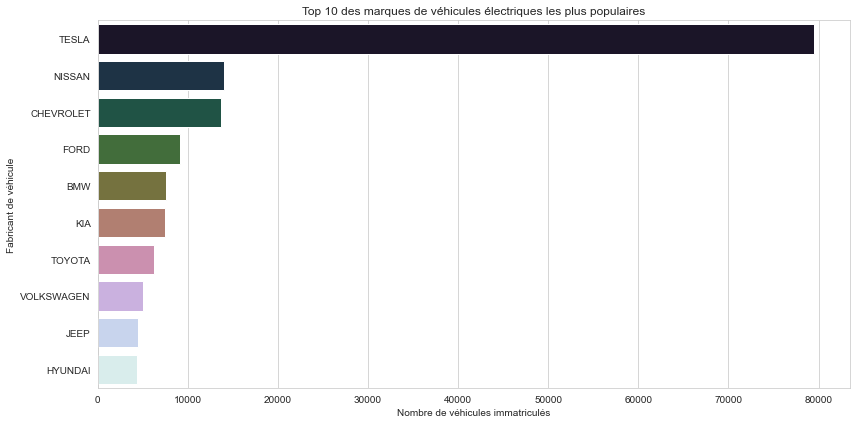

In [10]:
# Analyse de la popularité des faricants de véhicules électriques
ev_make_distribution = ev_data['Make'].value_counts().head(10)  # Limiting to top 10 for clarity

plt.figure(figsize=(12, 6))
sns.barplot(x=ev_make_distribution.values, y=ev_make_distribution.index, palette="cubehelix")
plt.title('Top 10 des marques de véhicules électriques les plus populaires')
plt.xlabel('Nombre de véhicules immatriculés')
plt.ylabel('Fabricant de véhicule')
plt.tight_layout()
plt.show()

Le graphique ci-dessus montre que :

    TESLA est en tête avec une marge substantielle, avec le plus grand nombre de véhicules immatriculés.
    NISSAN est le deuxième constructeur le plus populaire, suivi de CHEVROLET, bien que tous deux aient beaucoup moins d'immatriculations que TESLA.
    FORD, BMW, KIA, TOYOTA, VOLKSWAGEN, JEEP et HYUNDAI suivent par ordre décroissant du nombre de véhicules immatriculés.

Ensuite, examinons en détail les modèles les plus populaires de ces grands fabricants pour obtenir une compréhension plus détaillée des préférences des consommateurs au niveau du modèle :

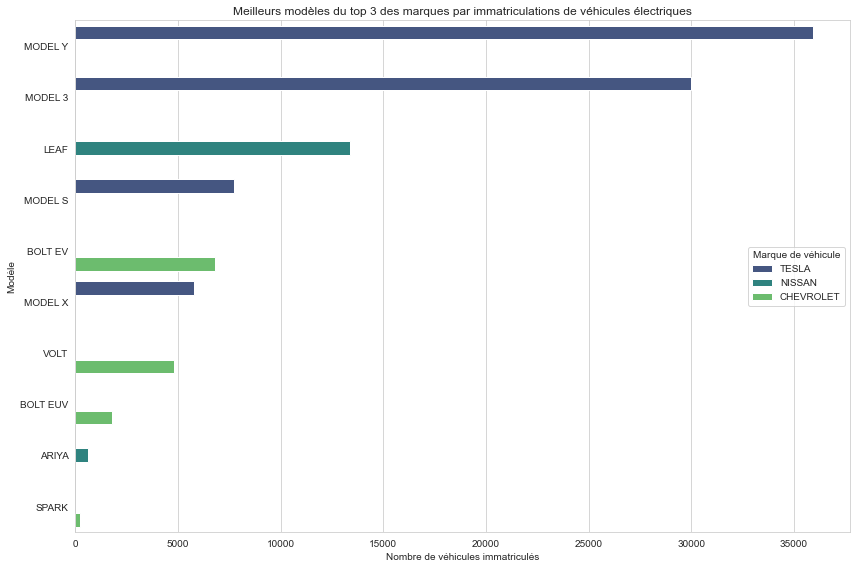

In [11]:
# Sélection des 3 premiers constructeurs en fonction du nombre de véhicules immatriculés
top_3_makes = ev_make_distribution.head(3).index

# Filtrage de l'ensemble de données pour ces principaux fabricants
top_makes_data = ev_data[ev_data['Make'].isin(top_3_makes)]

# Analyser la popularité des modèles de véhicules électriques chez ses grands constructeurs 
ev_model_distribution_top_makes = top_makes_data.groupby(['Make', 'Model']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

# Visualiser les 10 meilleurs modèles de ces fabricants pour plus de clarté
top_models = ev_model_distribution_top_makes.head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x='Number of Vehicles', y='Model', hue='Make', data=top_models, palette="viridis")
plt.title('Meilleurs modèles du top 3 des marques par immatriculations de véhicules électriques')
plt.xlabel('Nombre de véhicules immatriculés')
plt.ylabel('Modèle')
plt.legend(title='Marque de véhicule', loc='center right')
plt.tight_layout()

Le graphique ci-dessus montre la répartition des immatriculations de véhicules électriques selon les différents modèles des trois principaux constructeurs : Tesla, Nissan et Chevrolet. Voici les résultats :

    Les modèles TESLA MODEL Y et MODEL 3 sont les véhicules les plus immatriculés, le MODEL Y ayant le plus grand nombre d'immatriculations.
    La LEAF de NISSAN est le troisième modèle le plus immatriculé et le véhicule non-TESLA le plus immatriculé.
    Les modèles MODEL S et MODEL X de TESLA comptent également un nombre important d'immatriculations.
    Les BOLT EV et VOLT de CHEVROLET sont les suivantes dans le classement avec des immatriculations considérables, suivies de BOLT EUV.
    L'ARIYA de NISSAN et la SPARK de CHEVROLET ont le moins d'immatriculations parmi les modèles présentés.
    
Nous explorerons ensuite l'autonomie électrique des véhicules, un facteur essentiel pour analyser la taille du marché des véhicules électriques. L'autonomie indique la distance qu'un véhicule électrique peut parcourir avec une seule charge, et les progrès technologiques en matière de batteries ont régulièrement augmenté cette autonomie au fil des ans. Examinons donc la répartition des autonomies électriques dans l'ensemble de données et identifions les tendances notables, telles que les améliorations au fil du temps ou les variations entre les différents types de véhicules ou constructeurs.



# Analyse de l’autonomie électrique : analysez l’autonomie électrique des véhicules pour voir comment la technologie des véhicules électriques progresse.

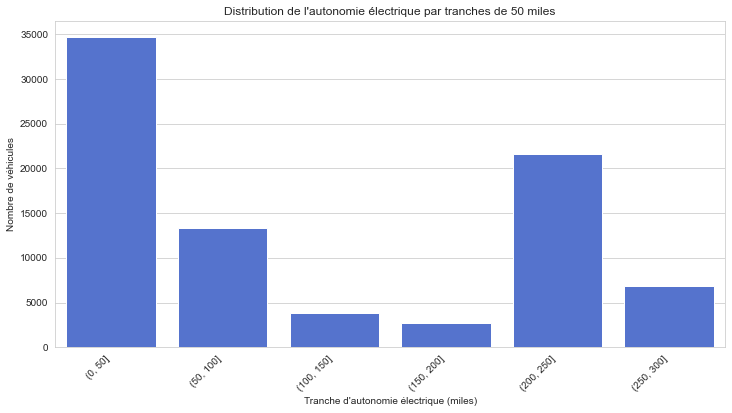

In [12]:
# Supprimer les lignes avec des valeurs manquantes dans 'Electric Range'
ev_data = ev_data.dropna(subset=['Electric Range'])

# Créer des tranches de 50 miles pour l'autonomie
bins = pd.interval_range(start=0, end=ev_data['Electric Range'].max(), freq=50)
ev_data['Range Bins'] = pd.cut(ev_data['Electric Range'], bins=bins, include_lowest=True)

plt.figure(figsize=(12, 6))
sns.countplot(x='Range Bins', data=ev_data, color='royalblue')

plt.title('Distribution de l\'autonomie électrique par tranches de 50 miles')
plt.xlabel('Tranche d\'autonomie électrique (miles)')
plt.ylabel('Nombre de véhicules')
plt.xticks(rotation=45, ha='right')

plt.show()

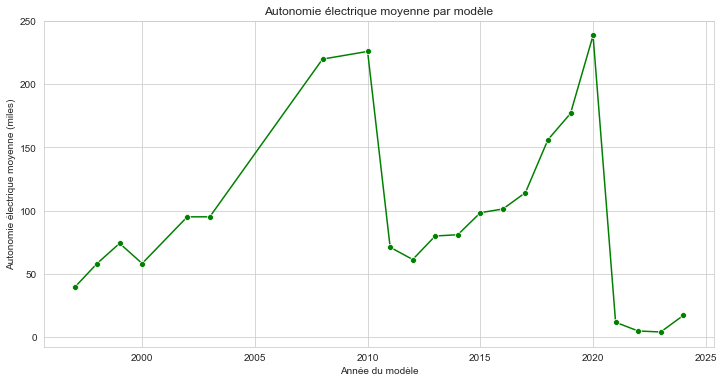

In [13]:
# Calcul de l'autonomie éléectrique moyenne par année modèle 
average_range_by_year = ev_data.groupby('Model Year')['Electric Range'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Model Year', y='Electric Range', data=average_range_by_year, marker='o', color='green')
plt.title('Autonomie électrique moyenne par modèle')
plt.xlabel('Année du modèle')
plt.ylabel('Autonomie électrique moyenne (miles)')
plt.grid(True)
plt.show()

Le graphique ci-dessus montre la progression de l'autonomie électrique moyenne des véhicules entre 2000 et 2024. Principales conclusions du graphique :

    On observe une tendance générale à la hausse de l’autonomie électrique moyenne des véhicules électriques au fil des ans, ce qui indique des améliorations de la technologie et de l’efficacité des batteries.
    On observe un pic notable vers 2020, lorsque la fourchette moyenne atteint son point le plus élevé.
    Après 2020, on observe une baisse significative de la gamme moyenne, ce qui pourrait indiquer que les données pour les années suivantes pourraient être incomplètes ou refléter l'introduction de plusieurs modèles de gamme inférieure.
    Après la forte baisse, on observe une légère reprise de la moyenne au cours de l'année la plus récente, comme le montre le graphique.
    Les données suggèrent que, malgré certaines fluctuations, la tendance générale au cours des deux dernières décennies a été à l’augmentation de l’autonomie électrique des véhicules électriques.

Examinons maintenant les différences entre les gammes de véhicules électriques des principaux fabricants et modèles. Cette analyse révèle comment les différents fabricants abordent cet aspect crucial de l'autonomie électrique et met en évidence les modèles qui se distinguent par leurs capacités d'autonomie supérieures :

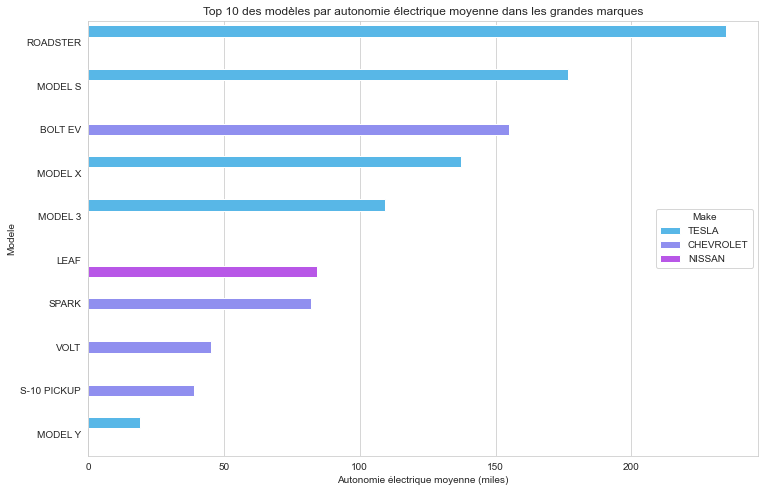

In [14]:
average_range_by_model = top_makes_data.groupby(['Make', 'Model'])['Electric Range'].mean().sort_values(ascending=False).reset_index()

# Les 10 meilleurs modèles avec l'autonomie électrique moyenne la plus élevée
top_range_models = average_range_by_model.head(10)

plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='Electric Range', y='Model', hue='Make', data=top_range_models, palette="cool")
plt.title('Top 10 des modèles par autonomie électrique moyenne dans les grandes marques')
plt.xlabel('Autonomie électrique moyenne (miles)')
plt.ylabel('Modele')
plt.legend(title='Make', loc='center right')
plt.show()

La TESLA ROADSTER affiche l'autonomie électrique moyenne la plus élevée parmi les modèles listés. Les modèles TESLA (ROADSTER, MODEL S, MODEL X et MODEL 3) occupent la majorité des premières places, ce qui indique qu'en moyenne, les véhicules TESLA ont une autonomie électrique plus élevée. La CHEVROLET BOLT EV fait figure d'exception parmi les modèles CHEVROLET, avec une autonomie nettement supérieure à celle de la VOLT et du S-10 PICKUP du même constructeur. La LEAF de NISSAN et la SPARK de CHEVROLET se situent dans la moitié inférieure du classement, ce qui suggère des autonomies moyennes plus modestes.

# Analyse de la taille estimée du marché des véhicules électriques aux États-Unis

C:\Users\PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


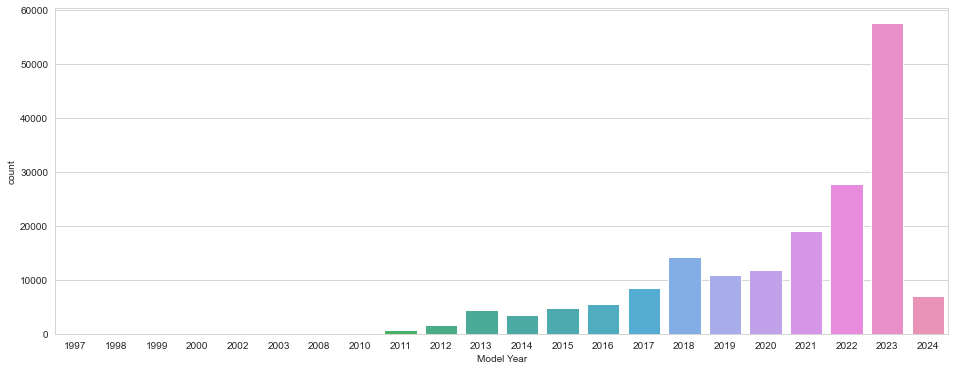

Model Year
1997        1
1998        1
1999        5
2000        7
2002        2
2003        1
2008       19
2010       23
2011      775
2012     1614
2013     4399
2014     3496
2015     4826
2016     5469
2017     8534
2018    14286
2019    10913
2020    11740
2021    19063
2022    27708
2023    57519
2024     7072
Name: count, dtype: int64

In [15]:
# Calculer le nombre de véhicules électriques immatriculés chaque années
ev_registration_counts = ev_data['Model Year'].value_counts().sort_index()
plt.figure(figsize=(16,6))
sns.countplot(ev_data['Model Year'])
plt.title("", size=15)
plt.show()
ev_registration_counts

L'ensemble de données indique le nombre de véhicules électriques immatriculés chaque année de 1997 à 2024. Cependant, les données pour 2024 sont incomplètes, car elles ne couvrent que la période allant jusqu'en mars. Voici un résumé des immatriculations de véhicules électriques des dernières années :

    En 2021, 19 063 véhicules électriques ont été immatriculés.
    En 2022, le nombre est passé à 27 708 véhicules électriques.
    En 2023, un bond significatif à 57 519 VE a été observé.
    Pour 2024, actuellement, 7 072 véhicules électriques sont immatriculés, ce qui suggère des données partielles.
    Pour prévoir le nombre total de véhicules électriques qui devraient être immatriculés en 2024, nous pouvons utiliser une approche basée sur le taux de croissance des années complètes précédentes.

Nous allons calculer le taux de croissance annuel composé (TCAC) entre une année récente pour laquelle nous disposons de données complètes (2023) et une année antérieure afin de projeter les chiffres de 2024. De plus, ce taux de croissance nous permet d'estimer la taille du marché pour les cinq prochaines années. Procédons aux calculs suivants :

In [16]:
# Filtrer l'ensemble de données pour inclure les années avec des données complètes, en supposant que 2023 est la dernière année complète
filtered_years = ev_registration_counts[ev_registration_counts.index <= 2023]

# Définir une fonction de croissance exponentiellle pour s'adapter aux données
def exp_growth(x, a, b):
    return a * np.exp(b * x)

# Préparer les données pour l'ajustement de la courbe 
x_data = filtered_years.index - filtered_years.index.min()
y_data = filtered_years.values

# Adapter les donner à la fonction de croissance exponentielle
params, covariance = curve_fit(exp_growth, x_data, y_data)

# Utiliser la fonction ajustée pour prévoir le nombre de véhicules électrique pour 2024 et les cinq prochaines années 
forecast_years = np.arange(2024, 2024 + 6) - filtered_years.index.min()
forecasted_values = exp_growth(forecast_years, *params)

# Créer un dictionnaire pour afficher les valeurs prévues pour une interprétation plus facile
forecasted_evs = dict(zip(forecast_years + filtered_years.index.min(), forecasted_values))

print(forecasted_evs)

{2024: 79079.20808938889, 2025: 119653.96274428742, 2026: 181047.22020265696, 2027: 273940.74706208805, 2028: 414497.01805382164, 2029: 627171.3128407666}


In [20]:
filtered_years

Model Year
1997        1
1998        1
1999        5
2000        7
2002        2
2003        1
2008       19
2010       23
2011      775
2012     1614
2013     4399
2014     3496
2015     4826
2016     5469
2017     8534
2018    14286
2019    10913
2020    11740
2021    19063
2022    27708
2023    57519
Name: count, dtype: int64

In [18]:
forecasted_evs

{2024: 79079.20808938889,
 2025: 119653.96274428742,
 2026: 181047.22020265696,
 2027: 273940.74706208805,
 2028: 414497.01805382164,
 2029: 627171.3128407666}

Maintenant, traçons les données estimées sur la taille du marché :


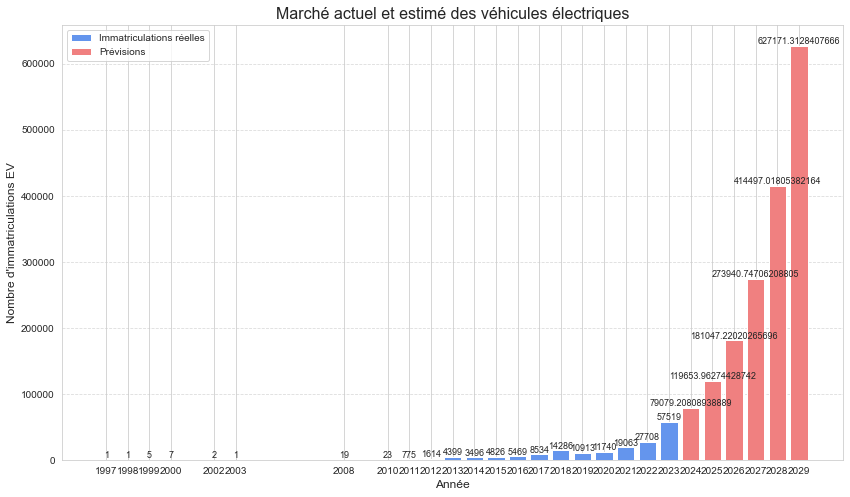

In [19]:
# Data creation (simulation)
filtered_years_data = filtered_years
filtered_years = pd.Series(filtered_years_data)
forecasted_evs = forecasted_evs

# Real data
actual_years = filtered_years.index
actual_values = filtered_years.values

# Forecast data
forecast_years = np.array(list(forecasted_evs.keys()))
forecast_values = np.array(list(forecasted_evs.values()))

# Create figure and axes
fig, ax = plt.subplots(figsize=(14, 8))

# Plot actual data
actual_bars = ax.bar(actual_years, actual_values, color='cornflowerblue', label='Immatriculations réelles', width=0.8)

# Plot forecast data
forecast_bars = ax.bar(forecast_years, forecast_values, color='lightcoral', label='Prévisions', width=0.8)

# Add data labels manually
for bar in actual_bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom', fontsize=9)

for bar in forecast_bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom', fontsize=9)

# Customize plot
ax.set_title('Marché actuel et estimé des véhicules électriques', fontsize=16)
ax.set_xlabel('Année', fontsize=12)
ax.set_ylabel("Nombre d'immatriculations EV", fontsize=12)
ax.set_xticks(np.concatenate((actual_years, forecast_years)))
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

D'après le graphique ci-dessus, nous pouvons voir :

    Le nombre d’immatriculations de véhicules électriques est resté relativement faible et stable jusqu’en 2010 environ, après quoi on a observé une tendance à la hausse constante et marquée, suggérant une augmentation significative de l’adoption des véhicules électriques.
    Les prévisions d’immatriculations de véhicules électriques prévoient une augmentation encore plus spectaculaire dans un avenir proche, le nombre d’immatriculations devant augmenter fortement dans les années à venir.
    
Compte tenu de la tendance à la hausse des immatriculations de véhicules électriques et de l'accélération prévue par les données prévisionnelles, nous pouvons conclure que le marché des véhicules électriques devrait connaître une expansion considérable. La forte hausse des immatriculations prévues suggère une adoption croissante des véhicules électriques par les consommateurs, et cette tendance devrait se poursuivre. Globalement, les données laissent entrevoir un avenir prometteur pour le secteur des véhicules électriques, indiquant une évolution significative des préférences des consommateurs et une augmentation potentielle des investissements et des opportunités commerciales.

# Résumé

L'analyse de la taille du marché est donc un aspect crucial des études de marché, car elle permet de déterminer le volume de ventes potentiel d'un marché donné. Elle aide les entreprises à comprendre l'ampleur de la demande, à évaluer les niveaux de saturation du marché et à identifier les opportunités de croissance. Notre analyse de la taille du marché des véhicules électriques révèle un avenir prometteur pour le secteur, indiquant une évolution significative des préférences des consommateurs et une augmentation potentielle des investissements et des opportunités commerciales.

